Imports


In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
from random import *

Problem 1
- Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

In [0]:
def get_random_data(w, b, mu, sigma, m):
    data = np.zeros((m, 2))
    labels = np.zeros((m, 1))
    i = 0

    while i < m:
        rand = random()
        
        # Choose c at random
        c = 0
        if rand > 0.5:
            c = 1

        # Choose the two features x_1 and x_2
        x_1 = np.random.random()
        n = np.random.normal(mu, sigma)
        x_2 = w * x_1 + b + (-1)**c * n

        # Add ith entries to data and label arrays
        data[i][0] = x_1
        data[i][1] = x_2
        labels[i] = c

        i += 1
    xline = np.linspace(0, 1, 100)
    yline = w * xline + b
    plt.plot(xline, yline, 'black') 

    return data, labels

- Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0

In [0]:
def display_random_data(data, labels, w, b, m):
    for i in range(0, m):
        if labels[i] == 0:
            plt.plot(data[i][0], data[i][1],"b.")
        else:
            plt.plot(data[i][0], data[i][1],"r.")
    
    xline = np.linspace(0, 1, 100)
    yline = w * xline + b
    plt.plot(xline, yline, 'black') 

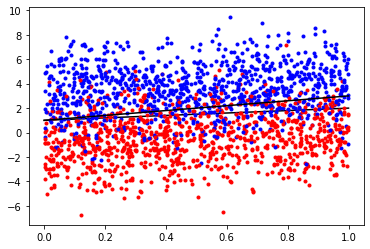

In [11]:
data, labels = get_random_data(1, 1, 2, 2, 2000)
display_random_data(data, labels, 2, 1, 2000)

Split the data/labels into a training set (80%) and a test set (20%).

In [0]:
m = 2000
size = (int) (m * 0.8)
data_train = data[:size]
labels_train = labels[:size]

data_validate = data[size:]
labels_validate = labels[size:]

Problem 2

Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss

source: https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR

In [0]:
def build_and_compile_model():
    # build model
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape = (2,)))

    # compile model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    
    return model

In [15]:
model = build_and_compile_model()

history = model.fit(data_train,
                    labels_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(data_validate, labels_validate))

Epoch 1/200
4/4 [==============================] - 0s 43ms/step - loss: 0.4182 - accuracy: 0.7987 - val_loss: 0.4113 - val_accuracy: 0.8025
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4206 - accuracy: 0.8000 - val_loss: 0.4101 - val_accuracy: 0.8025
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.4558 - accuracy: 0.8000 - val_loss: 0.4088 - val_accuracy: 0.8025
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.4420 - accuracy: 0.8012 - val_loss: 0.4079 - val_accuracy: 0.8050
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4397 - accuracy: 0.8025 - val_loss: 0.4070 - val_accuracy: 0.8050
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 0.4389 - accuracy: 0.8025 - val_loss: 0.4061 - val_accuracy: 0.8100
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4245 - accuracy: 0.8019 - val_loss: 0.4053 - val_accuracy: 0.8150
Epoch 8/200
4/4 [=====

source: https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/imdb_movie_reviews_classification_dense_layers.ipynb

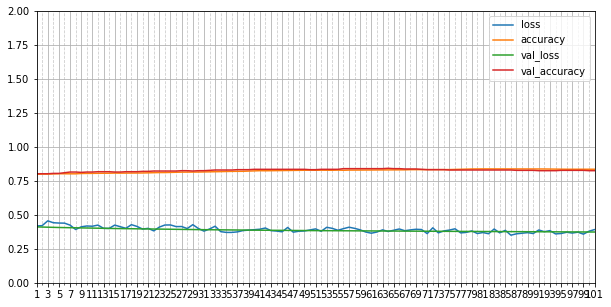

In [16]:
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)

plt.gca().set_ylim(0, 2) 
plt.gca().set_xlim(0, 100)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

plt.show()

[]

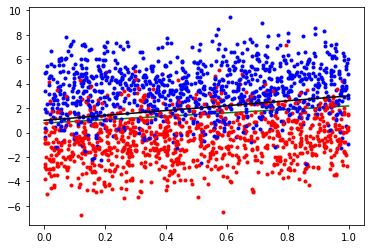

In [23]:
x = np.linspace(0.0, 1.0, 100)

model_x = np.linspace(0.0, 1.0, 100)
weights = model.layers[0].get_weights()

bias = weights[1][0]
x_1_weight = weights[0][0]
x_2_weight = weights[0][1]

model_y = (-(bias / x_2_weight) / (bias / x_1_weight)) * model_x + (-bias / x_2_weight)

plt.plot(model_x, model_y, color = "green")
display_random_data(data, labels, 2, 1, 2000)
plt.plot()

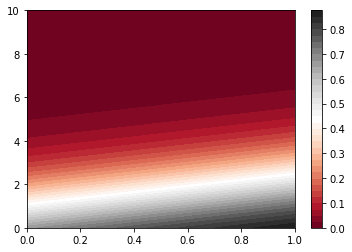

In [22]:
x_lin = np.linspace(0,1,500)
y_lin = np.linspace(0,10,500)

fig = plt.figure()

X, Y = np.meshgrid(x_lin,y_lin)

z = model.predict(np.c_[X.ravel(), Y.ravel()])

z = z.reshape(X.shape)

plt.xlim([0,1])
plt.ylim([0,10])

plt.contourf(X,Y,z, 40, cmap='RdGy')
plt.colorbar()
plt.show()

Problem 3
- Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1

source: https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

In [0]:
def logistic_regression(data, labels):
    # 200 epochs
    epochs = 200
    # learn rate of 0.001
    lr = 0.001

    w = np.random.rand(2)
    b = np.zeros(1)

    i = 0
    while i < epochs:
        z = w * data[i][0] + w * data[i][1] + b
        #sigmoid function
        a = 1 / (1 + np.exp(-z))

        # gradient of cross-entropy loss
        grad_w = (a - labels[i]) * data[i][0] + (a - labels[i]) * data[i][1]
        grad_b = a - labels[i]

        w = w - (lr * grad_w)
        b = b - (lr * grad_b)
    return w, b

In [0]:
def compute_accuracy(data, labels, w, b, m, t):
    res = 0

    i = 0
    while i < m:
        z = w * data[i][0] + w *data[i][1] + b
        a = 1 / (1 + np.exp(-z))
        if a >= t:
            a = 1
        else:
            a = 0
        
        if labels[i] == a:
            res += 1
    
    print(res / m)

In [0]:
def compute_loss(data, labels, w, b, m, t):
    res = 0
    i = 0
    while i < m:
        z = w * data[i][0] + w * data[i][1] + b
        a = 1 / (1 + np.exp(-z))

        res += labels[i] - a
    
    print(res / m)

In [0]:
# Split random data
m = 2000
data, labels = get_random_data(1, 1, 2, 2, 2000)
data_train = data[:1600]
labels_train = labels[:1600]
data_test = data[400:]
labels_test = labels[400:]

pred_w, pred_b = logistic_regression(data_train, labels_train)

t = 0.5
compute_accuracy(data_test, labels_test, pred_w, pred_b, t)
compute_loss(data_test, labels_test, pred_w, pred_b, t)

x_lin = np.linspace(0,1,500)
y_lin = np.linspace(0,10,500)

fig = plt.figure()

X, Y = np.meshgrid(x_lin,y_lin)

z = model.predict(np.c_[X.ravel(), Y.ravel()])

z = z.reshape(X.shape)

plt.xlim([0,1])
plt.ylim([0,10])

plt.contourf(X,Y,z, 40, cmap='RdGy')
plt.colorbar()
plt.show()